## Lecture 15 - Plotting in Python 

This second project will introduce you to working with and plotting/respresenting data.
(Written by Peter Frinchaboy, Mia Bovill, and John Donor)

In [6]:
# Import the needed fuctions
from matplotlib import pyplot as plt
import numpy as np

Lets plot our data from last class!!!  YAY WE GET TO FINALLY MAKE PLOTS!

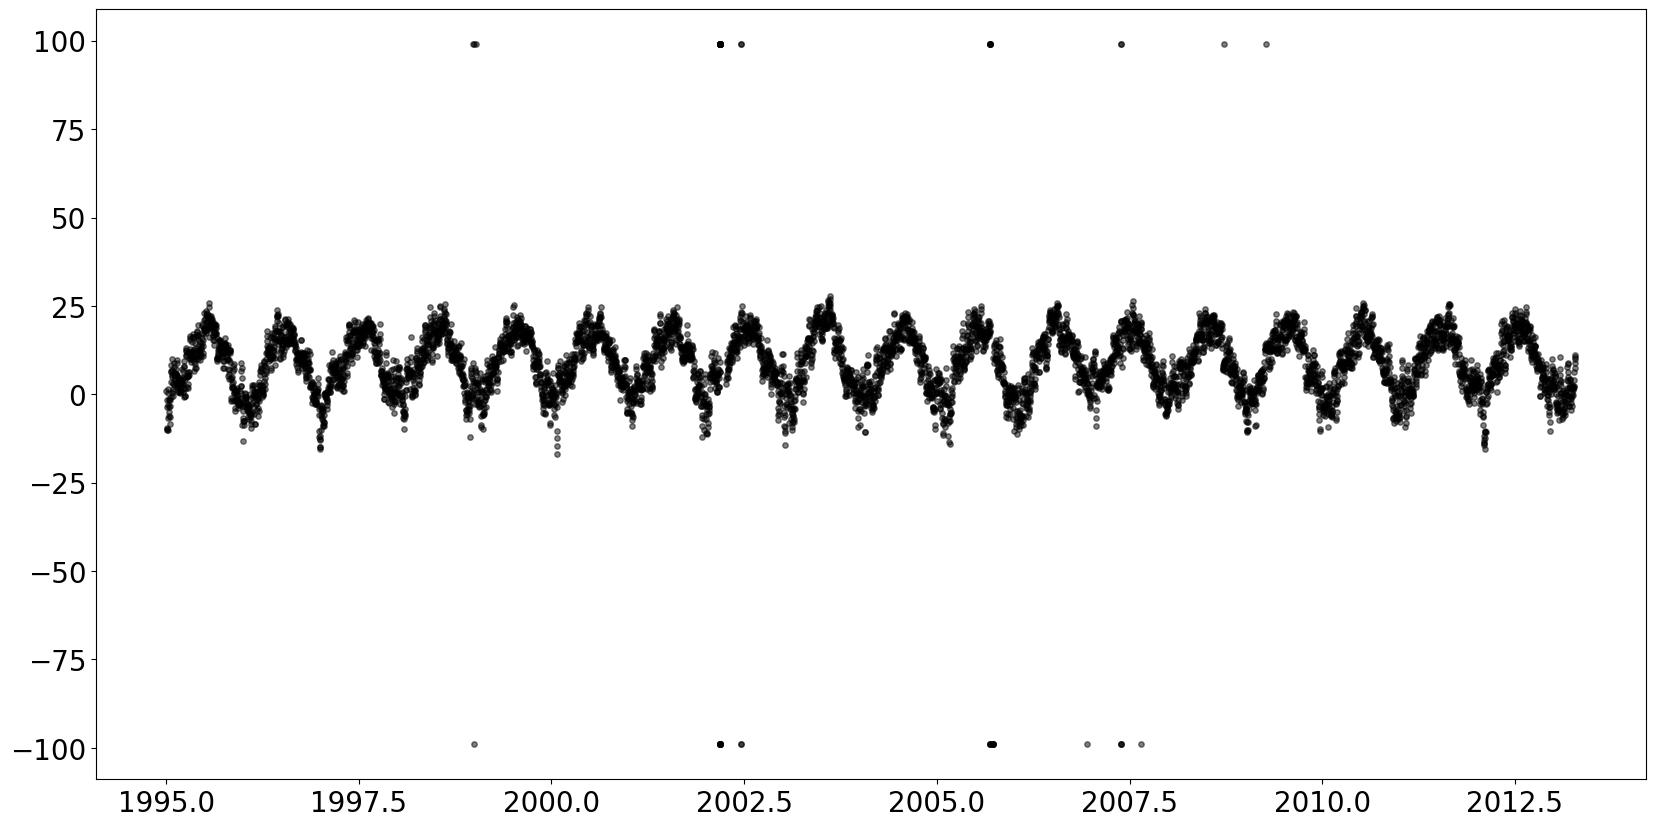

In [7]:
# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures_average_with_bad_data.txt")
Date = data[:,0]
Temp = data[:,1] 

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date,Temp,s=15,c='k',alpha=0.5)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)



(2001.5, 2003.5)

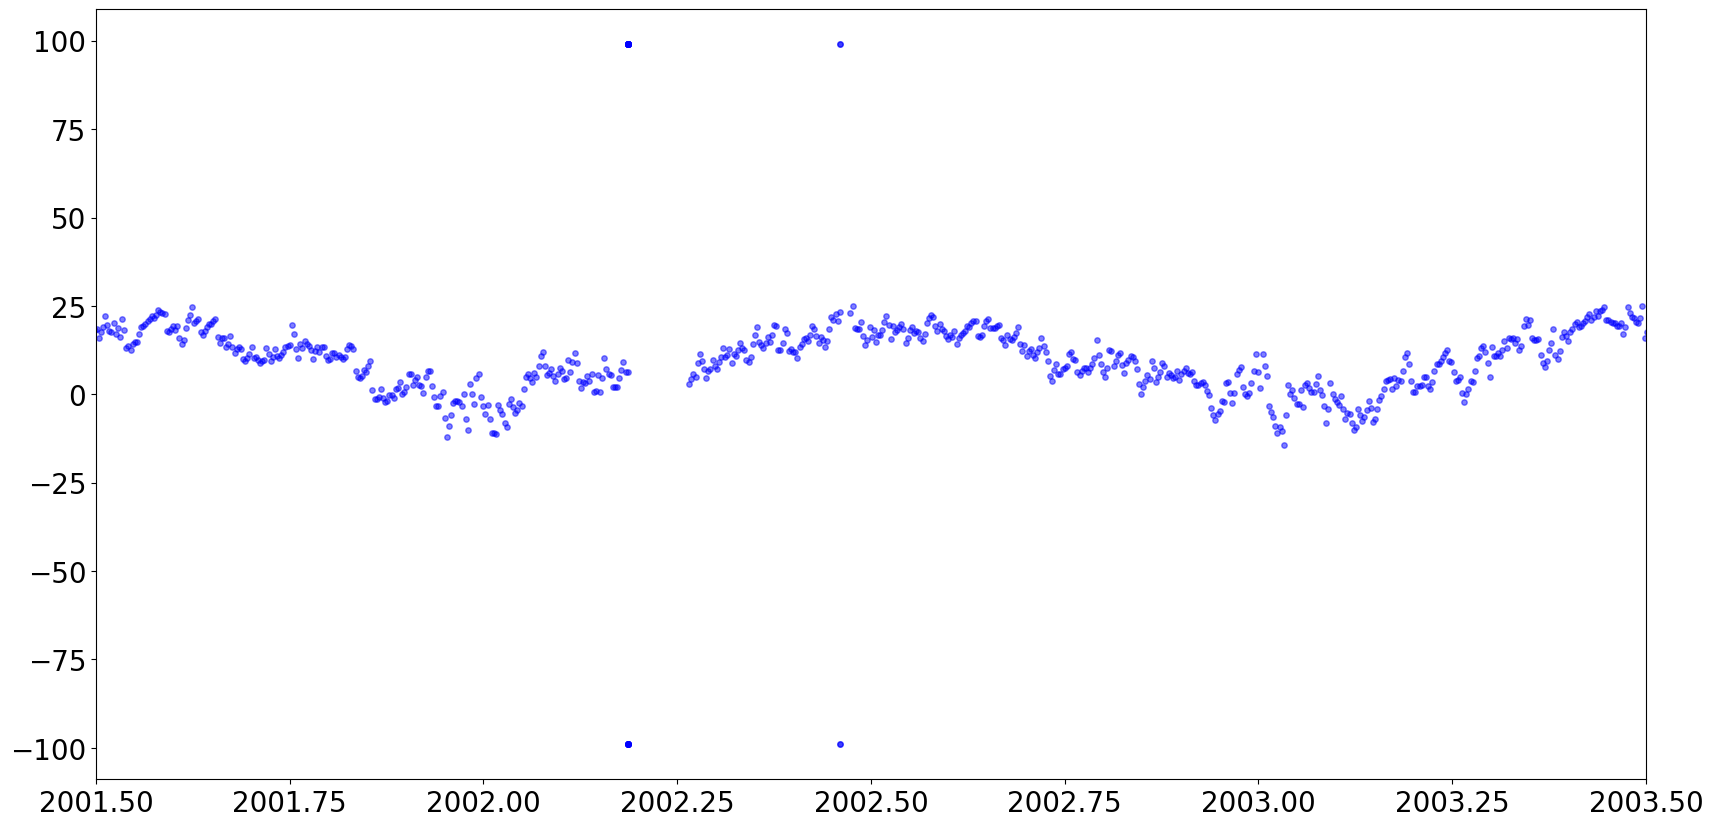

In [8]:
# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures_average_with_bad_data.txt")
Date = data[:,0]
Temp = data[:,1] 

# PLOT TO VERIFY FILE READ 
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date,Temp,s=15,c='b',alpha=0.5)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# LIMIT TO 1.5 YEARS
ax1.set_xlim(2001.5,2003.5)


## Exercise 1

Now remake the plot using the 'masked' (see Monday's Notebook) data to remove the bad data points

(2001.5, 2003.5)

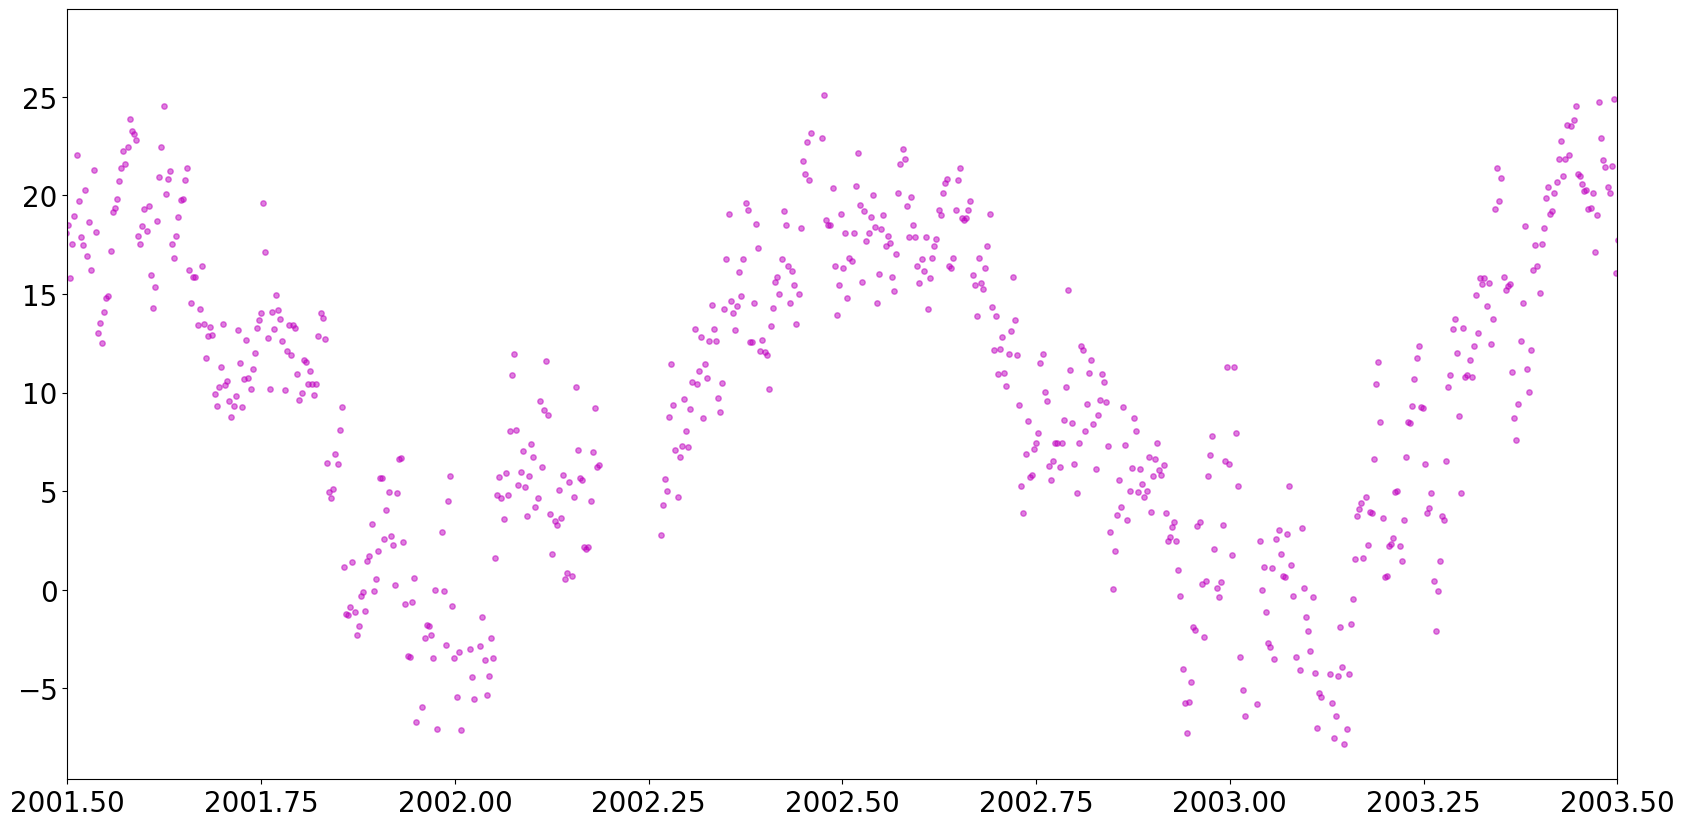

In [9]:
#code here
# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures_average_with_bad_data.txt")
Date = data[:,0]
Temp = data[:,1] 


date, temp = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = (temp > -8) & (temp < 37)
date_new = date[keep]
temp_new = temp[keep]

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(date_new,temp_new,s=15,c='m',alpha=0.5)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# LIMIT TO 1.5 YEARS
ax1.set_xlim(2001.5,2003.5)



## A second plot

You will first need to download the plain text data file "CG20.dat", that we will read in to have data to plot.

In [10]:
# This will read in the data into a numpy array
data = np.genfromtxt("CG20.dat", delimiter=",", names = True)
# This will seperate specific columns of the data into newly created variables

#AgeNN = data[:,14]  # Log Age 
#DistPc = data[:,17] # Distance
#XGC = data[:,18]   # X-coordinate
#YGC = data[:,19]   # Y-coordinate
#ZGC = data[:,20]   # Z-coordinate
#RGC = data[:,21]   # Radius-coordinate

AgeNN = data['AgeNN']
GLON = data['GLON']
GLAT = data['GLAT']
pmRA = data['pmRA']
pmDE = data['pmDE']
Z = data['Z']
Rgc = data['Rgc']
DistPc = data['DistPc']

print(pmRA)


[-1.737 -1.737  0.934 ... -2.896 -1.    -4.54 ]


Next will will gerenerate a first plot of mass vs velocity. 

This will introduce the first options you will have.

NameError: name 'XGC' is not defined

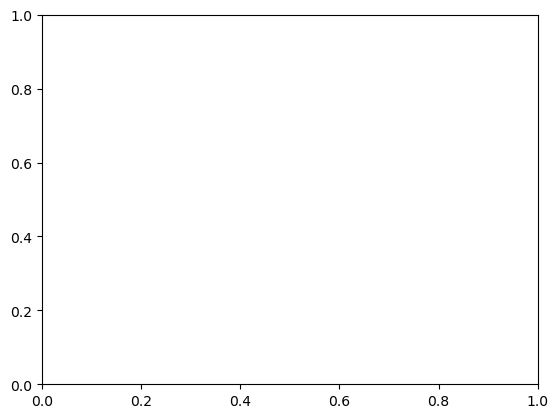

In [11]:
# Creating a scatter plot in log log space using an object oriented approach
fig = plt.figure()                           # makes a figure
ax = fig.add_subplot(111)                    # make a 1,1,1 (single) figure
ax.scatter(XGC,YGC,s=5,c='k',alpha=0.3)      # makes a scatter plot (s = size, c = color, alpha = transparency)


In [ ]:
# Changing the size of the plot -- figsize
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111)
ax.scatter(XGC,YGC,s=5,c='k',alpha=0.3)    # makes a scatter plot (s = size, c = color, alpha = transparency)



Well this looks like a nice plot, but if you gave this to someone could they tell what it was a plot of?

We need add labels to inform the reader, also we will limit the plot to only show a portion of the data.

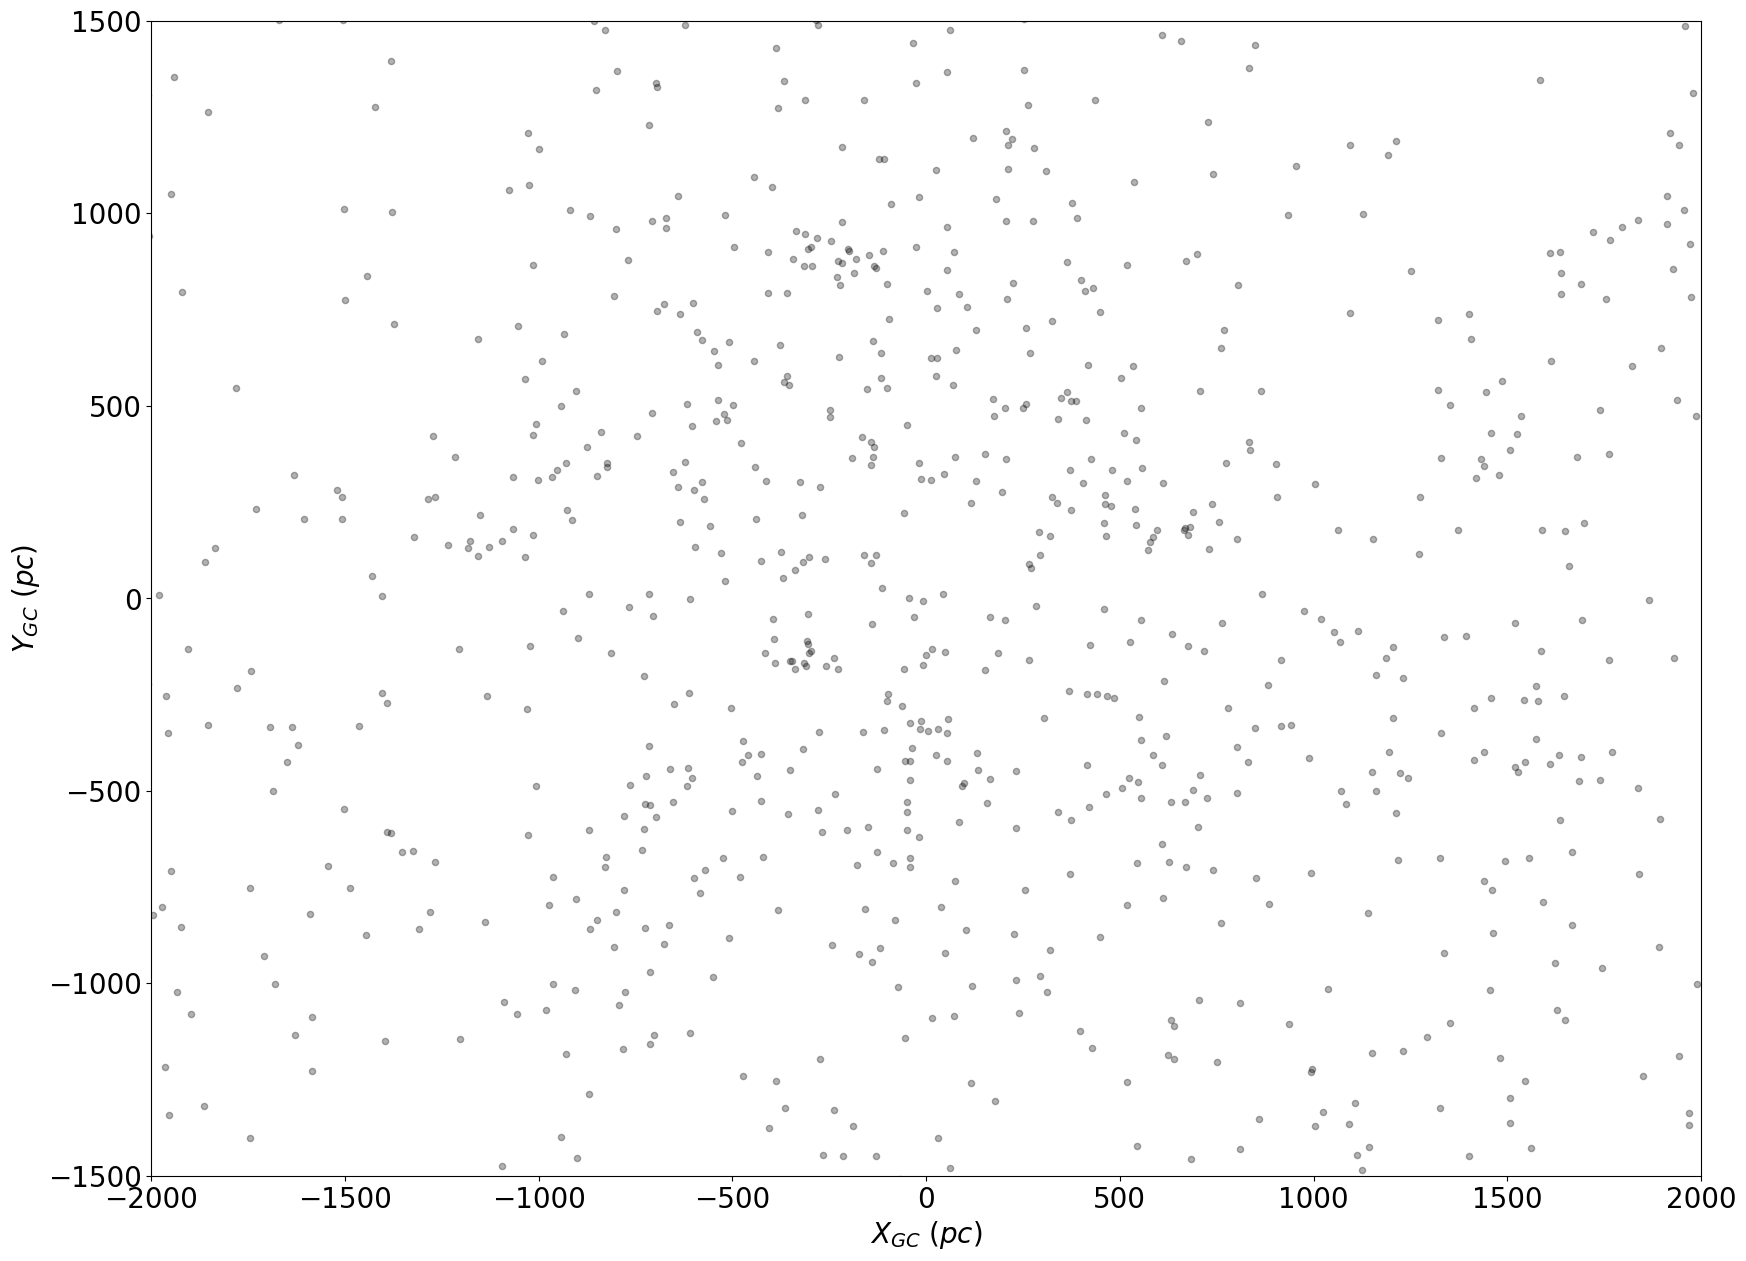

In [12]:
# Reread the data to get ALL of the columns
data = np.genfromtxt("CG20.dat", delimiter=",", names = True)

# this is the same as above
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(data['X'],data['Y'],s=20,c='k',alpha=0.3)    # makes a scatter plot (s = size, c = color, alpha = transparency)


# Now, we will label the axis and set the limits of the axis and increase ticksize of the axis
# Set the start and end of range you want to display on the x and yaxis 
ax.set_xlim(-2000,2000)
ax.set_ylim(-1500,1500)

# add the labels
ax.set_xlabel("$X_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating
ax.set_ylabel("$Y_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

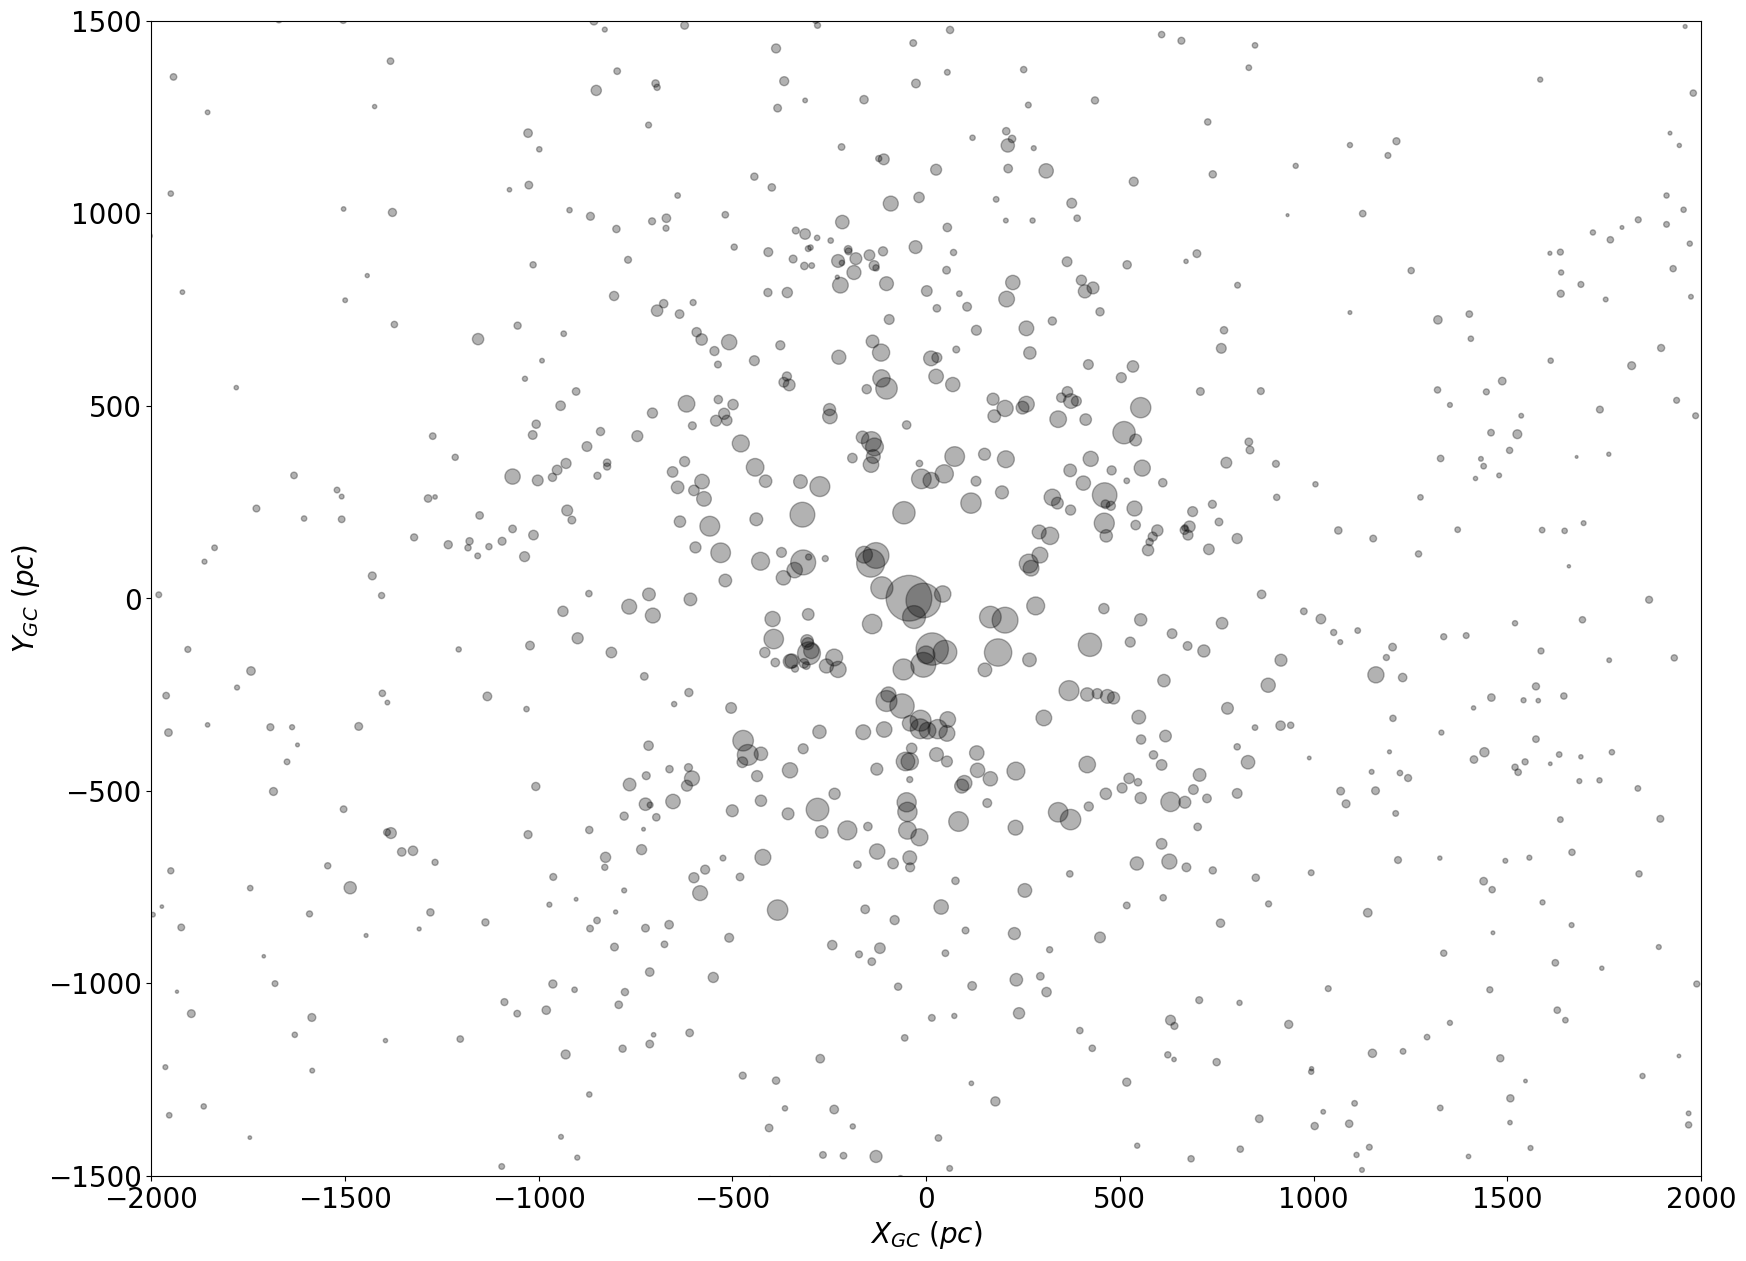

In [13]:
# this is the same as above
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

# Sizing the points according to a 3rd attribute - rvir
ax.scatter(data['X'],data['Y'],s=200*data['r50'],c='k',alpha=0.3)  

# Now, we will label the axis and set the limits of the axis and increase ticksize of the axis
# Set the start and end of range you want to display on the x and yaxis 
ax.set_xlim(-2000,2000)
ax.set_ylim(-1500,1500)

# add the labels
ax.set_xlabel("$X_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating
ax.set_ylabel("$Y_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

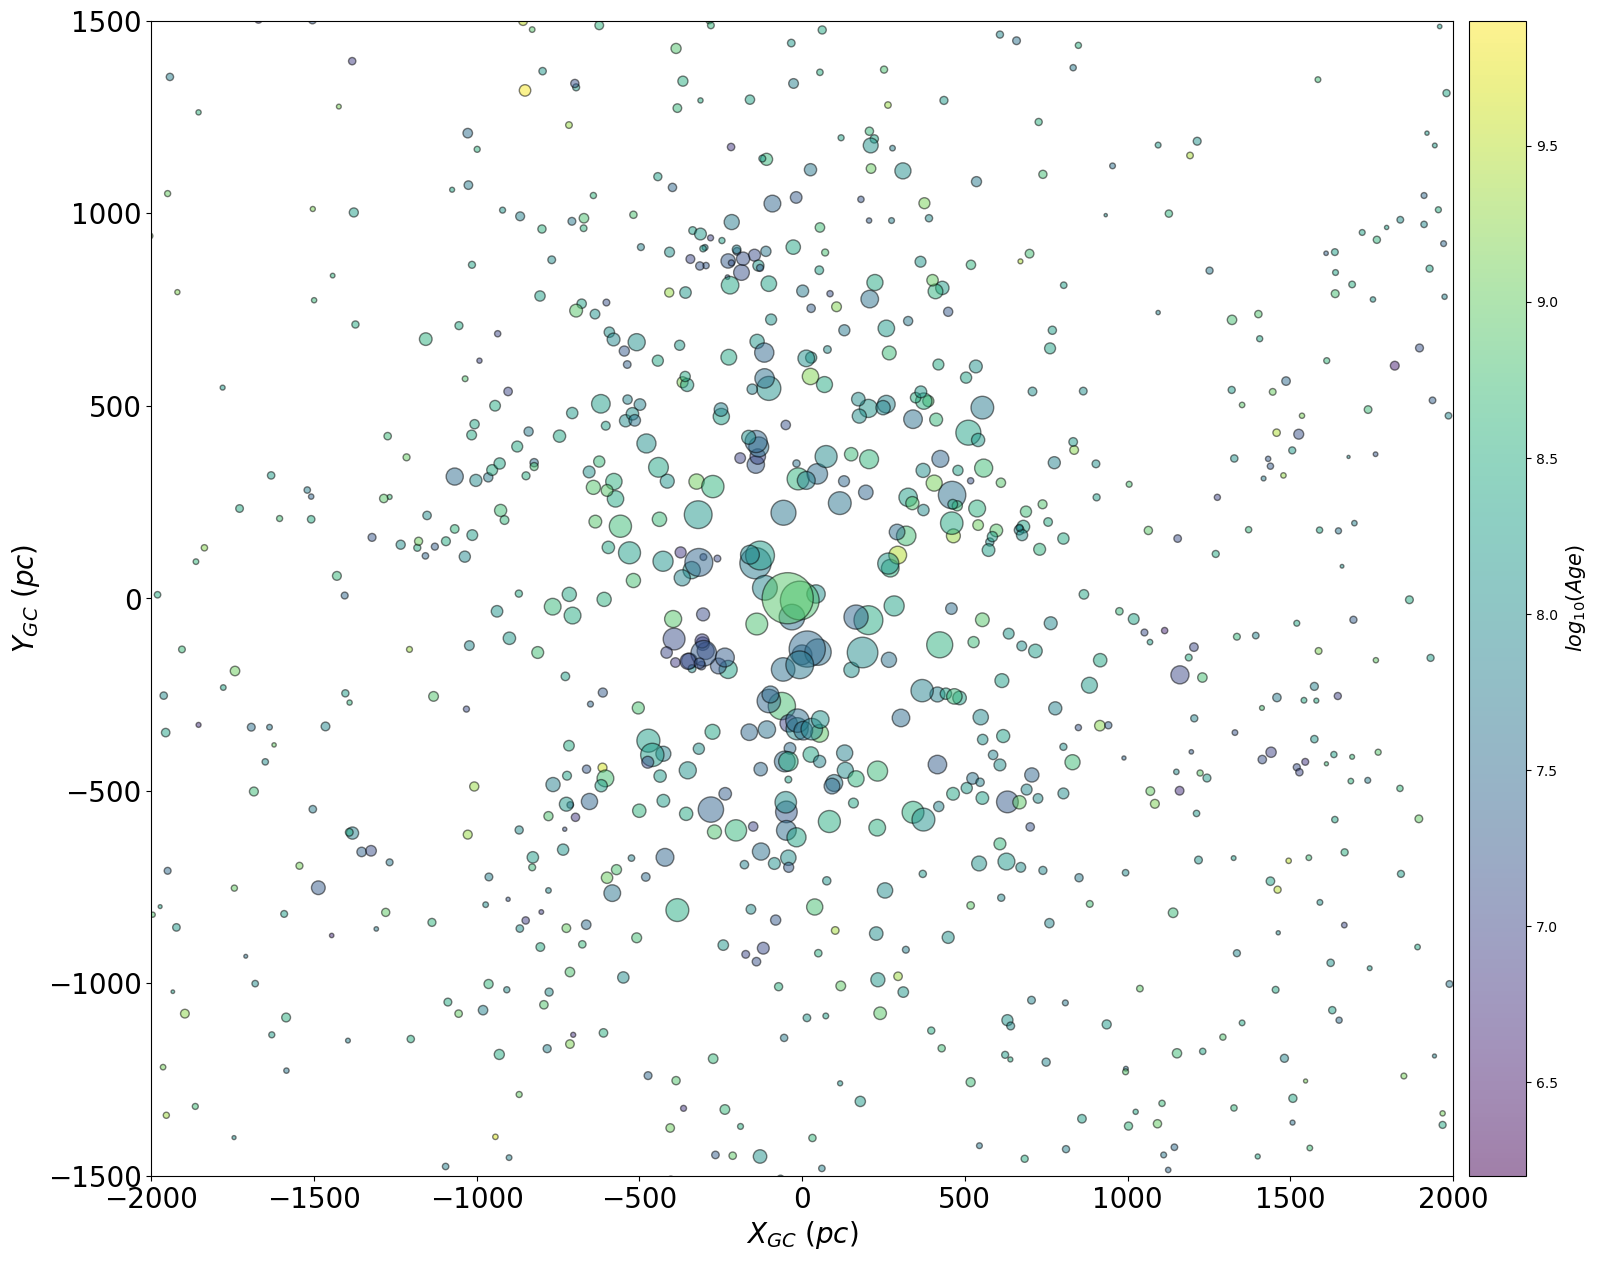

In [14]:
# this is the same as above
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

# Coloring the points by a 4th attribute and adding a color bar
image = ax.scatter(data['X'],data['Y'],s=250*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)


# Now, we will label the axis and set the limits of the axis and increase ticksize of the axis
# Set the start and end of range you want to display on the x and yaxis 
ax.set_xlim(-2000,2000)
ax.set_ylim(-1500,1500)

# add the labels
ax.set_xlabel("$X_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating
ax.set_ylabel("$Y_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)




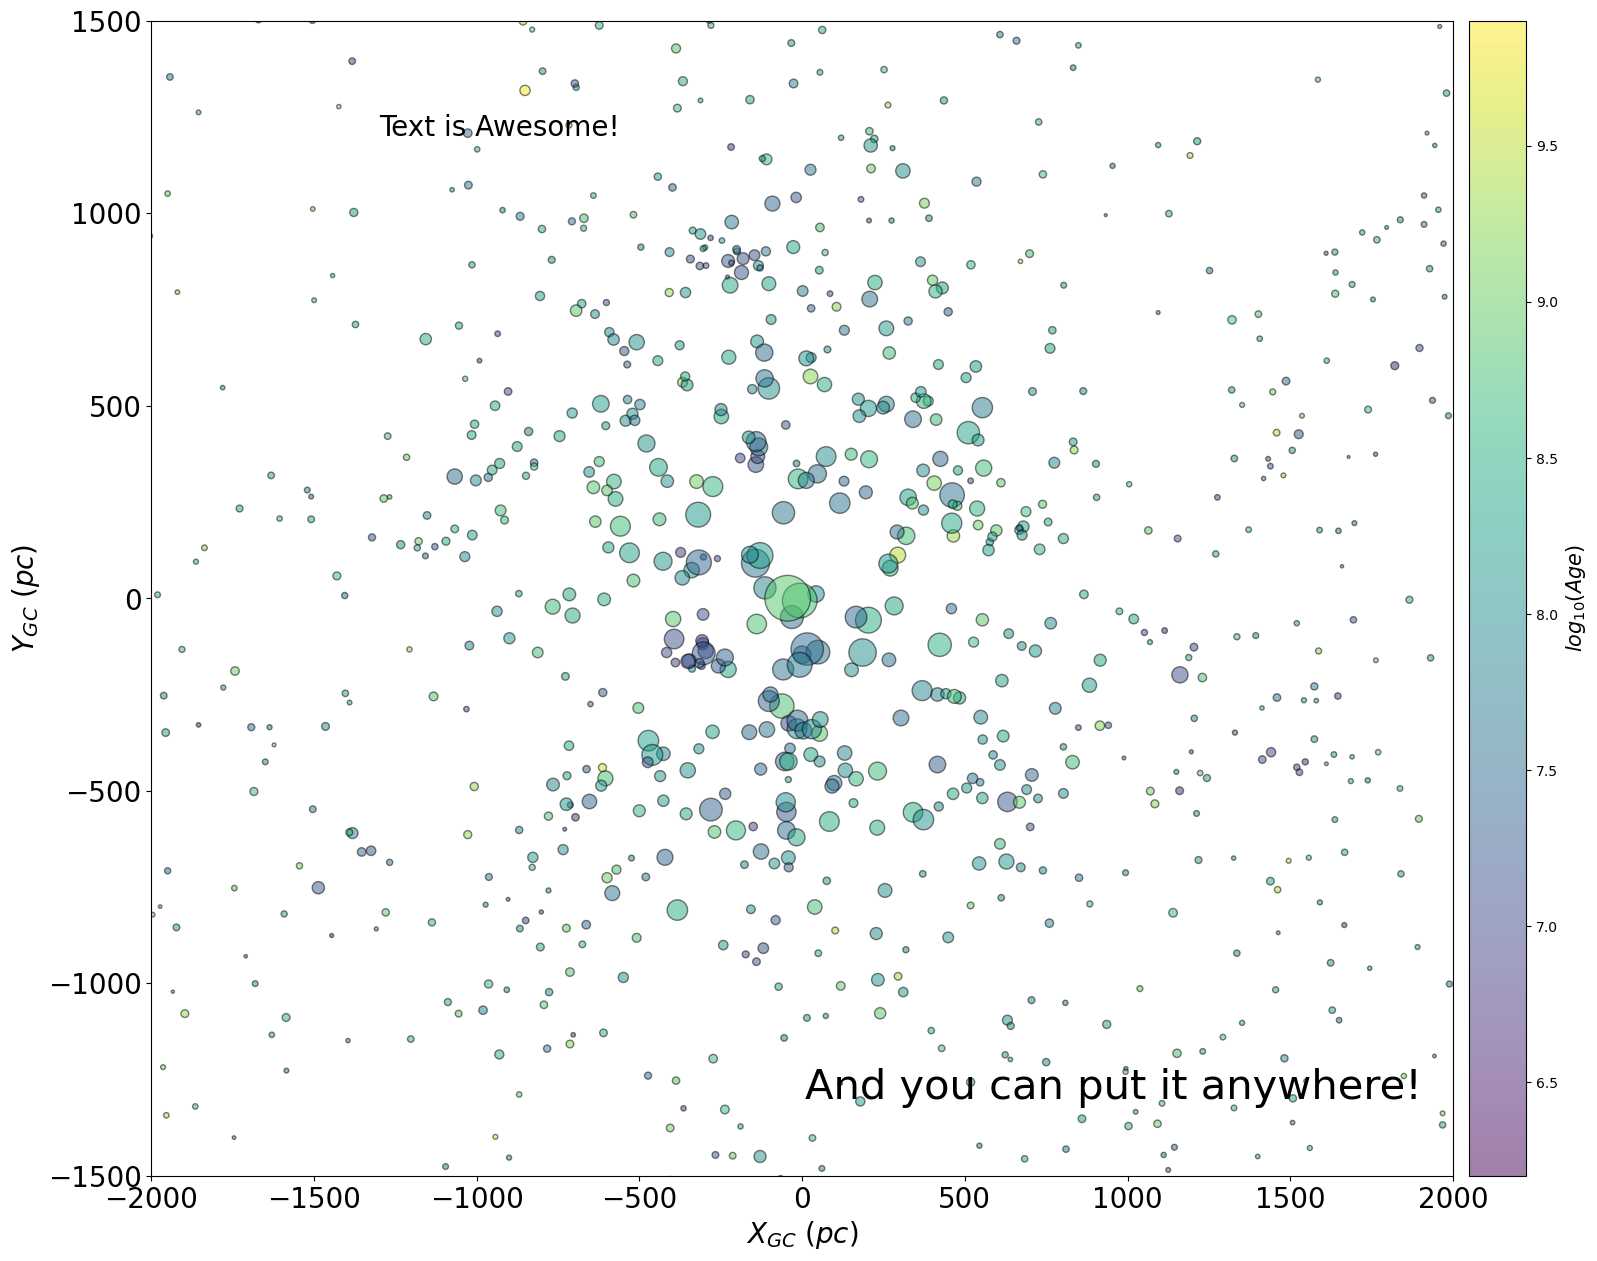

In [15]:
# this is the same as above
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

# Coloring the points by a 4th attribute and adding a color bar
image = ax.scatter(data['X'],data['Y'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)


# Now, we will label the axis and set the limits of the axis and increase ticksize of the axis
# Set the start and end of range you want to display on the x and yaxis 
ax.set_xlim(-2000,2000)
ax.set_ylim(-1500,1500)

# add the labels
ax.set_xlabel("$X_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating
ax.set_ylabel("$Y_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating

# NOW WE CAN ADD TEXT!!
ax.text(-1300, 1200, "Text is Awesome!",size=20)
ax.text(10, -1300, "And you can put it anywhere!",size=30)

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)




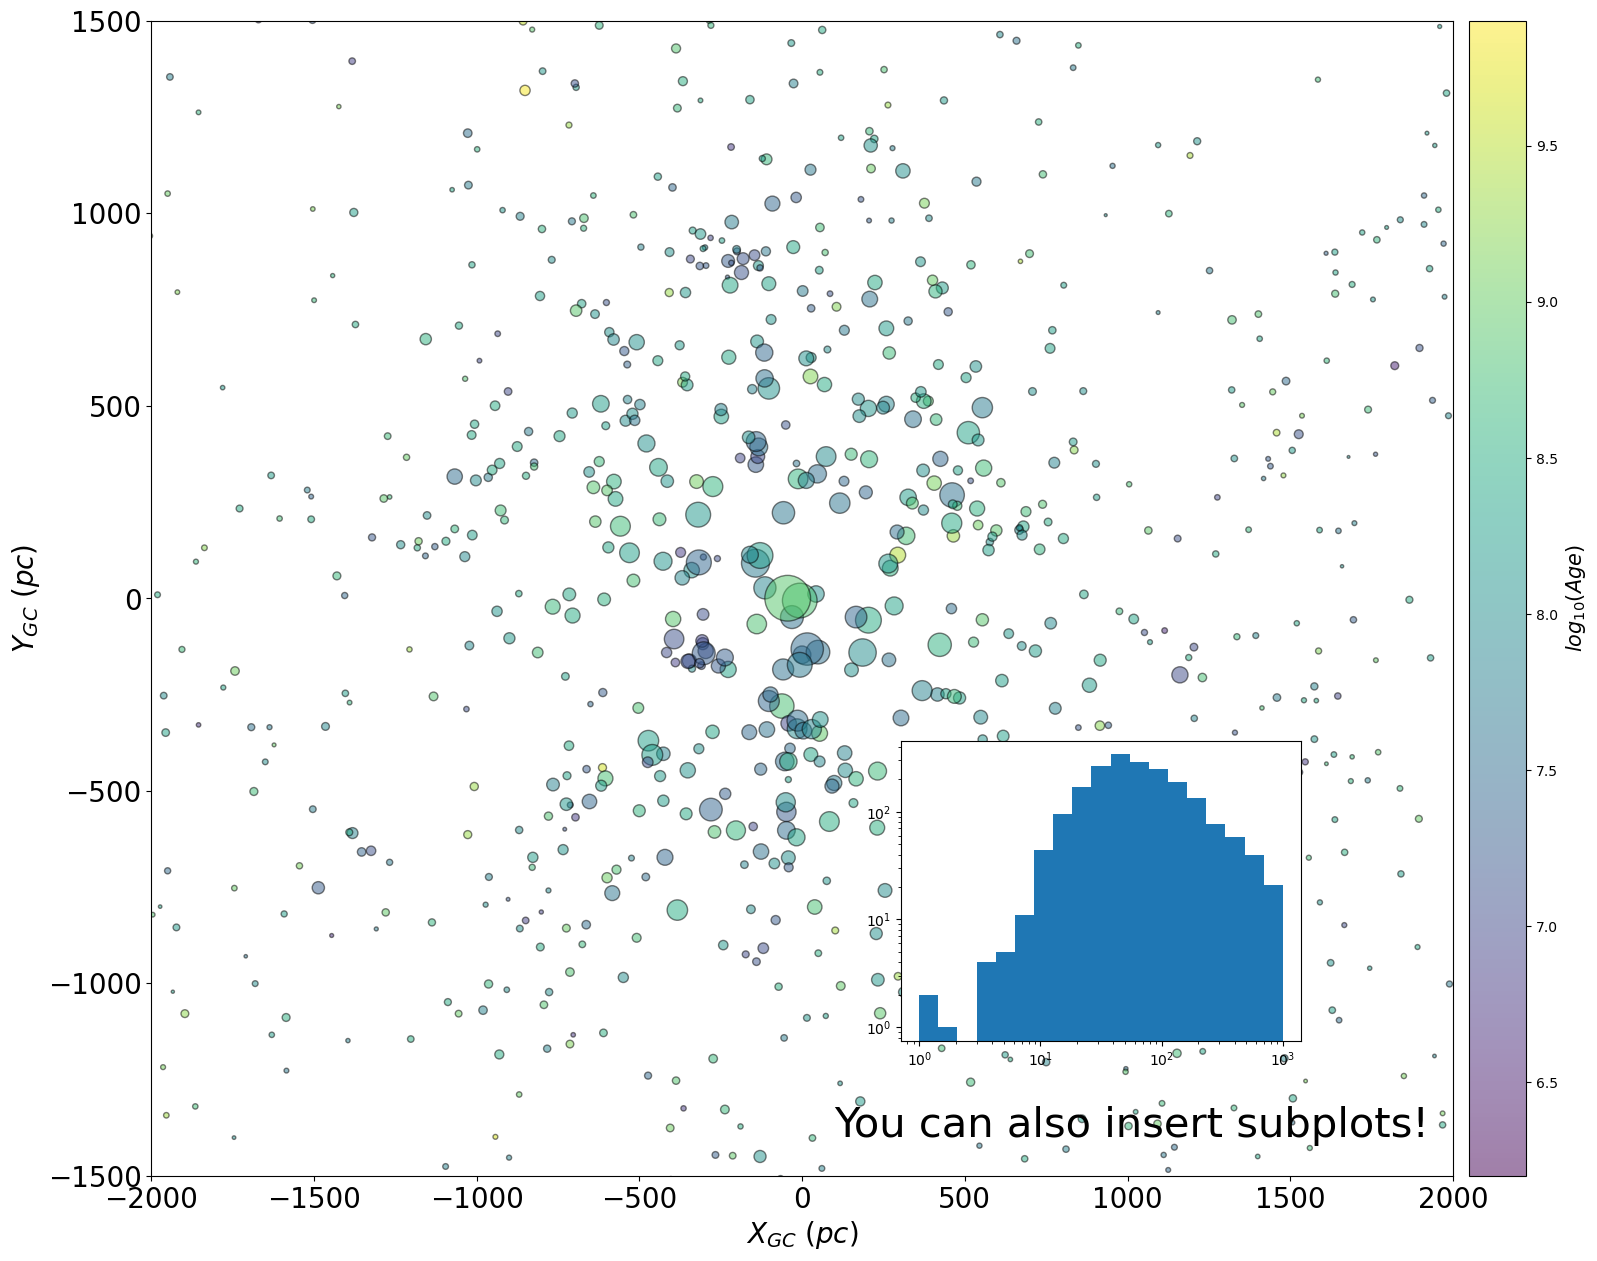

In [16]:
# this is the same as above
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

# Coloring the points by a 4th attribute and adding a color bar
image = ax.scatter(data['X'],data['Y'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)

ax.text(100, -1400, "You can also insert subplots!",size=30)

# Inserting a subplot
ax_sub = fig.add_axes([0.5,0.2,0.2,0.2])
ax_sub.hist(data['nbstars07'],bins=np.logspace(0,3,20),log='True')
ax_sub.set_xscale('log')


ax.set_xlim(-2000,2000)
ax.set_ylim(-1500,1500)

ax.set_xlabel("$X_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating
ax.set_ylabel("$Y_{GC}$ $(pc)$",size=20)   # allows LaTeX style formating






# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)



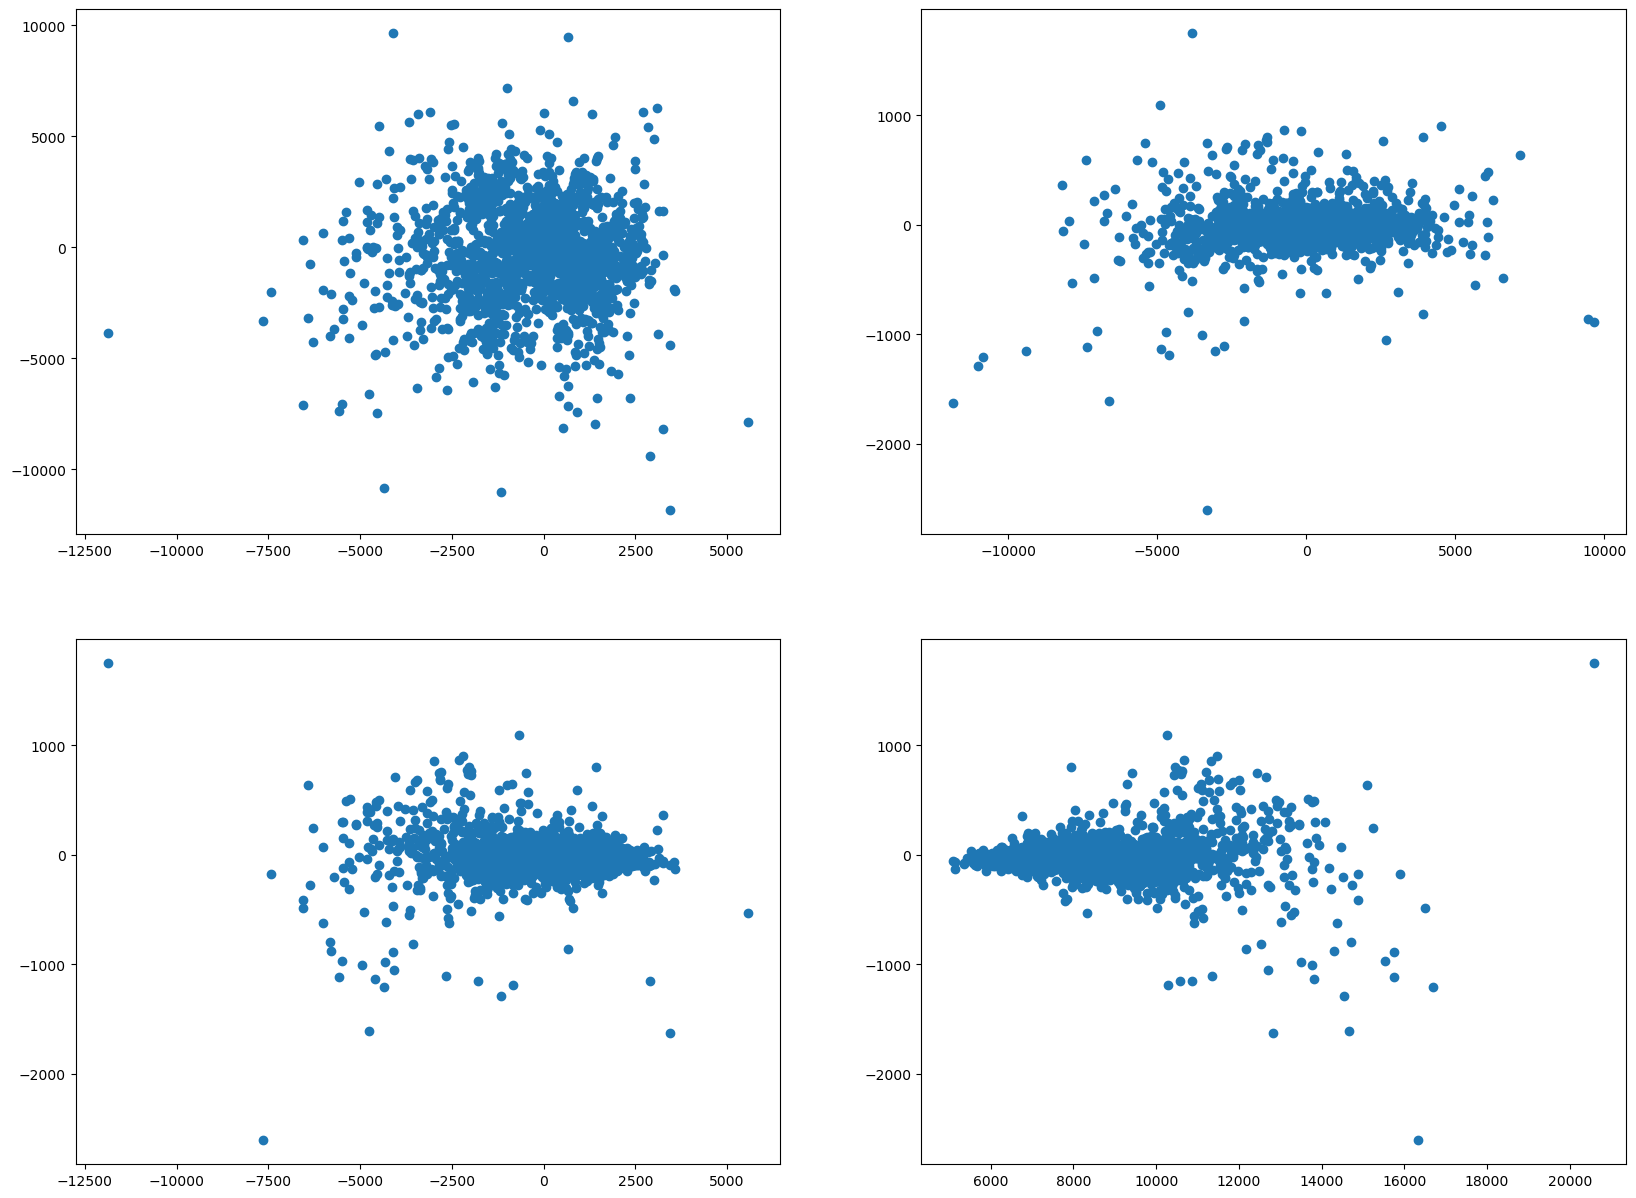

In [17]:
# Adding multiple plots
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1.scatter(data['X'],data['Y'])

ax2 = fig.add_subplot(222)
ax2.scatter(data['Y'],data['Z'])

ax3 = fig.add_subplot(223)
ax3.scatter(data['X'],data['Z'])

ax4 = fig.add_subplot(224)
ax4.scatter(data['Rgc'],data['Z'])

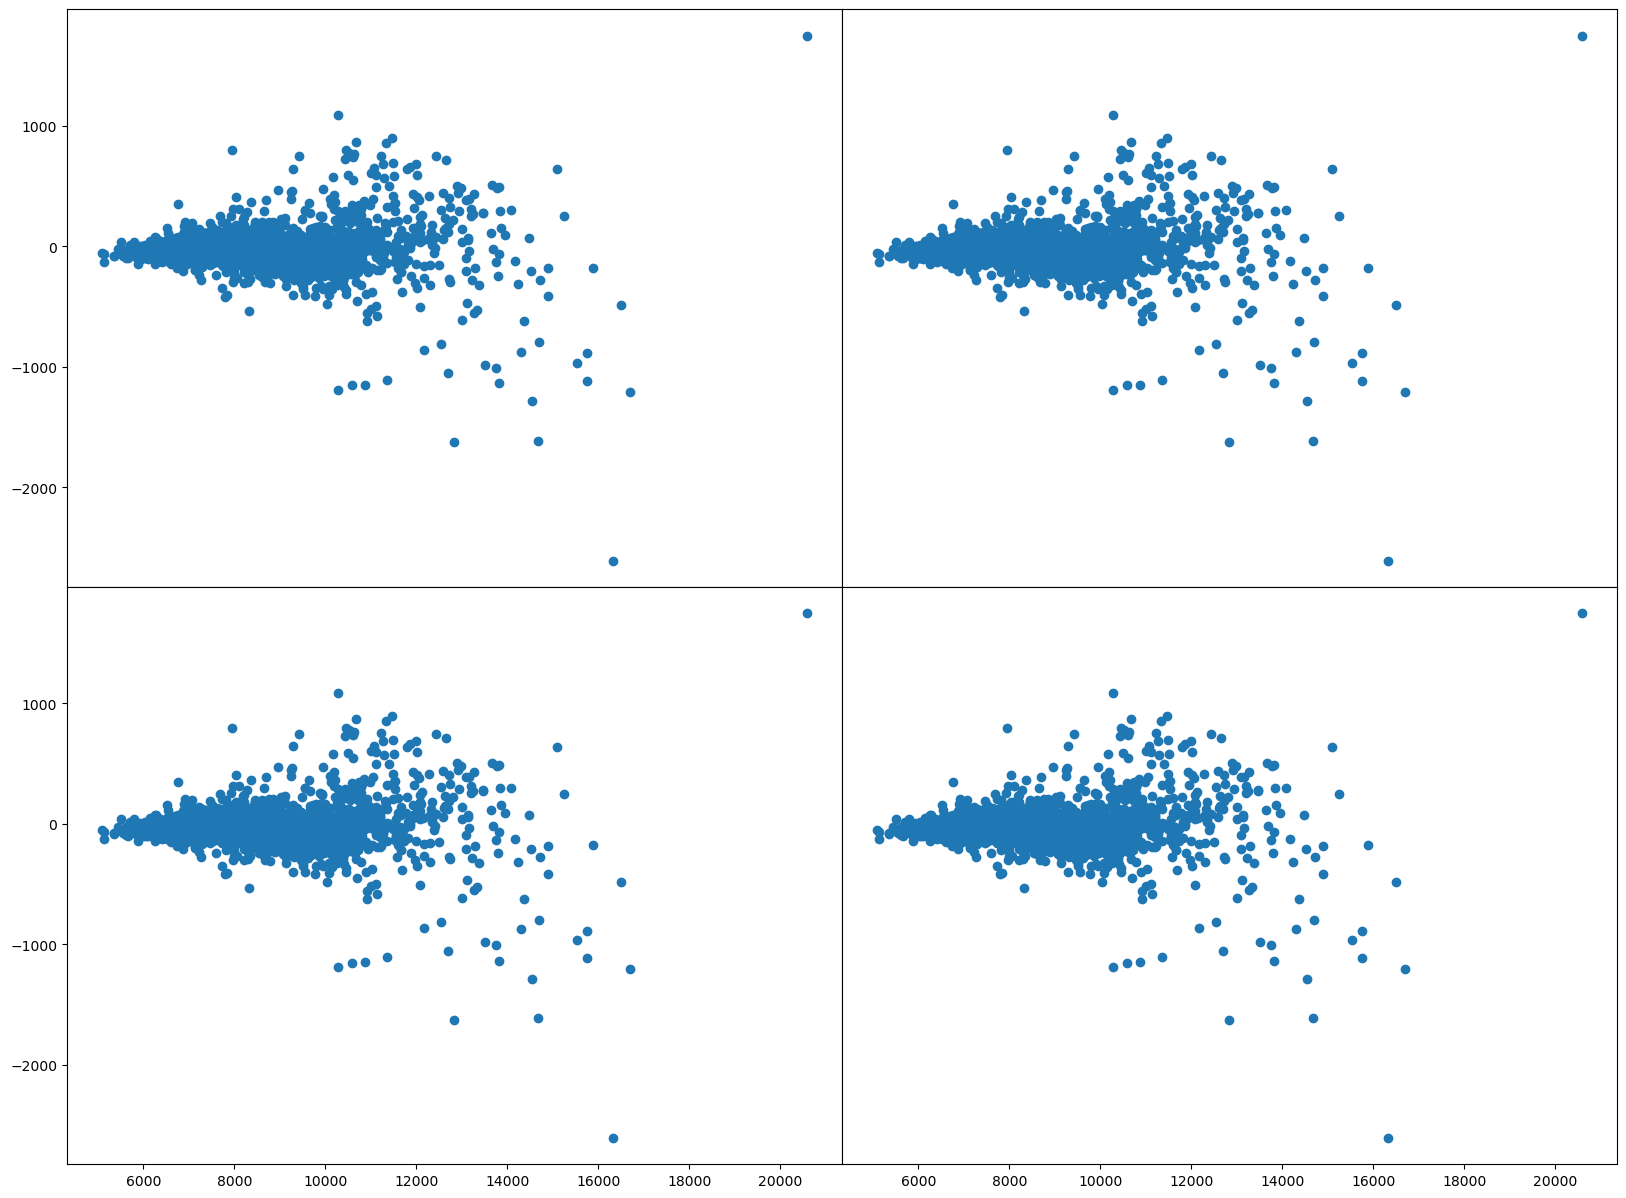

In [18]:
fig = plt.figure(figsize=(20,15))

# Condensing the plots
fig.subplots_adjust(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(221)
ax1.scatter(data['Rgc'],data['Z'])

ax2 = fig.add_subplot(222)
ax2.scatter(data['Rgc'],data['Z'])

ax3 = fig.add_subplot(223)
ax3.scatter(data['Rgc'],data['Z'])

ax4 = fig.add_subplot(224)
ax4.scatter(data['Rgc'],data['Z'])

# Removing unneeded tick axis
ax1.set_xticks([])
ax2.set_yticks([])
ax2.set_xticks([])
ax4.set_yticks([])

# AND CAN SAVE YOUR FIGURES  (jpeg, pdf)!   
plt.savefig("CG20_tmp.jpeg")

## Homework #7 

**REMINDER:** *All coding assignment will be turned in as .ipynb files, to the same PHYS_X0223 repository on GitHub.*   
*They should be turned in with the following naming:*
    
    Lastname_Firstinitial_23_HW#.ipynb

### Make a 4-panel Plot.

Panel 1) GLON vs. GLAT

Panel 2) pmRA* vs pmDE

Panel 3) Rgc vs. Z

panel 4) AgeNN vs. DistPc

Give the sizes of the points by 'r50' and color the points by AgeNN. 

**Make sure to label ALL your axis and include a colorbar.  This will be judged on how clear/readable you final plots are.**<br>
*NOTE: Extra awesome points for adding an inserted histgram of 'nbstars07' into one of its plots.*

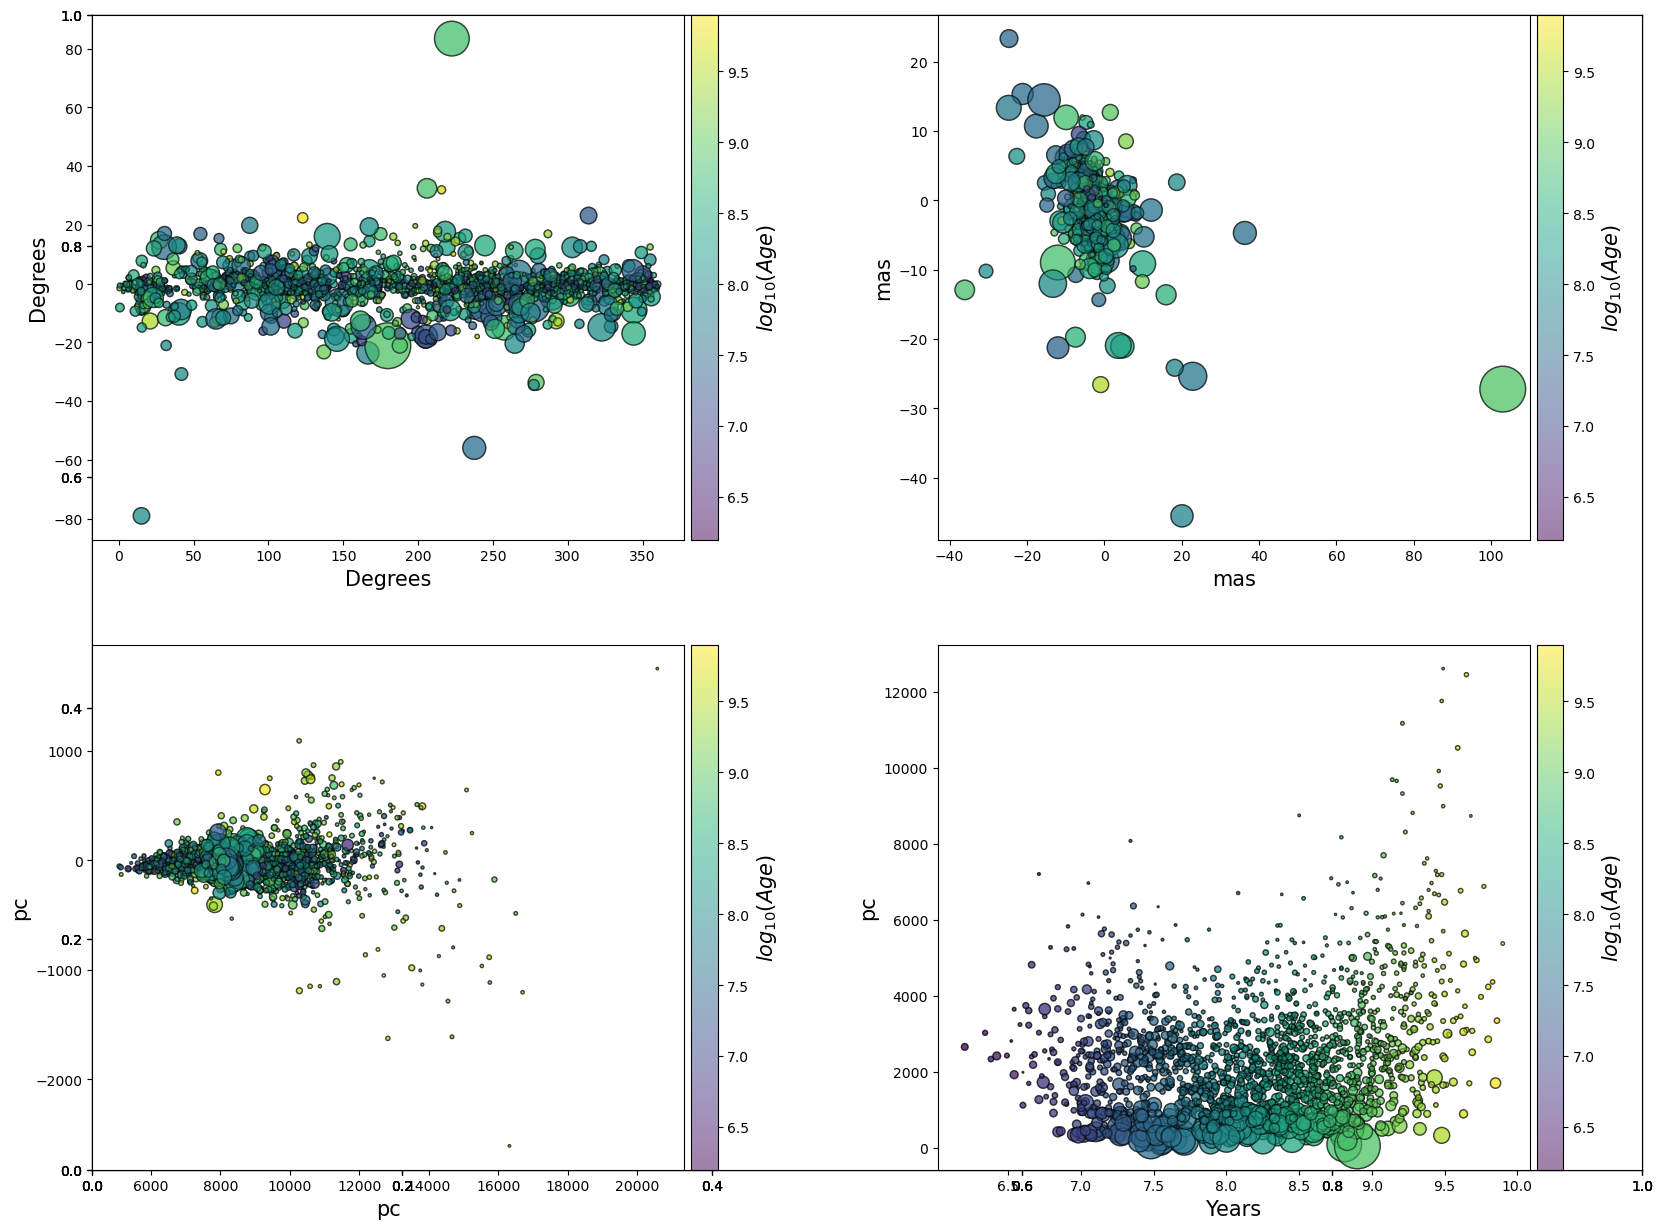

In [44]:
# Adding multiple plots
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


#Panel 1 - degrees
ax1 = fig.add_subplot(221)
ax1.scatter(data['GLON'],data['GLAT'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)

ax1.set_xlabel("Degrees",size=15)   
ax1.set_ylabel("Degrees",size=15)  

image = ax1.scatter(data['GLON'],data['GLAT'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)

#Panel 2 - milli amp seconds
ax2 = fig.add_subplot(222)
ax2.scatter(data['pmRA'],data['pmDE'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)

ax2.set_xlabel("mas",size=15)   
ax2.set_ylabel("mas",size=15) 

image = ax2.scatter(data['pmRA'],data['pmDE'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)



#Panel 3 - parsecs (pc)
ax3 = fig.add_subplot(223)
ax3.scatter(data['Rgc'],data['Z'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)

ax3.set_xlabel("pc",size=15)   
ax3.set_ylabel("pc",size=15) 

image = ax3.scatter(data['Rgc'],data['Z'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)


#panel 4 - years / parsecs (pc)
ax4 = fig.add_subplot(224)
ax4.scatter(data['AgeNN'],data['DistPc'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)

ax4.set_xlabel("Years",size=15)   
ax4.set_ylabel("pc",size=15) 

image = ax4.scatter(data['AgeNN'],data['DistPc'],s=200*data['r50'],c=data['AgeNN'],edgecolor='k',cmap="viridis",alpha=0.5)#
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log_{10} (Age)$',size=15)



